In this colab notebook we work with the ocean salinity and temperature depths dataset found on https://developers.google.com/earth-engine/datasets/catalog/HYCOM_sea_temp_salinity

To try to seperate the work and creating all these plots as efficent ever notebook focuses on 3 different depths. This notebook focues of 4, 40, and 150m. Here we create a plot of the mean temperature and salinity throughout the months and years in our ROI. We also have created a gif that allows us to better understand the temperature and salinity change and how it compares to other features that are looked at. The method done for this is the similar to all the other ways graphs and gifs were generated. 

# Set up/import statements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install geemap

     |████████████████████████████████| 430kB 8.4MB/s 
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1


In [ ]:
!earthengine authenticate

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=nwt3ulj1IhL_JA91wFIijuFIRyaptbblN6NcRmyPb_c&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g55eE-V8PrcSSJStXHpsprSZepd0U547Ig1bPZ7COweQv4pwU5VPNs

Successfully saved authorization token.


In [ ]:
!pip install earthengine-api
!pip install folium

In [ ]:
import ee
import geemap
ee.Initialize()

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#from class
import json
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

jsonFile = '/content/drive/My Drive/ML/Final_Project/map.geojson'

with open(jsonFile, 'r') as file:
  jsonLoad = json.load(file)

geometry = jsonLoad['features'][0]['geometry']

# Ocean Depth: 4m

In [ ]:
from datetime import datetime, timedelta

In [ ]:
years = [2014,2015,2016]
days_aggregate = 30
day_step = 7

In [ ]:
sd_2014_4 = datetime(years[0], month=1, day=1)
ed_2014_4 = sd_2014_4 + timedelta(days=days_aggregate)

sd_2015_4 = datetime(years[1], month=1, day=1)
ed_2015_4 = sd_2015_4 + timedelta(days=days_aggregate)

sd_2016_4 = datetime(years[2], month=1, day=1)
ed_2016_4 = sd_2016_4 + timedelta(days=days_aggregate)

In [ ]:
wt4_2014 = list()
wt4_2015 = list()
wt4_2016 = list()

s4_2014 = list()
s4_2015 = list()
s4_2016 = list()

dates = list()

In [ ]:
aoi = ee.Geometry(geometry)
ic_wt4 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('water_temp_4')
ic_s4 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('salinity_4')

In [ ]:
sd_2014_4 = '2014-01-01'
ed_2014_4 = '2014-12-31'

sd_2015_4 = '2015-01-01'
ed_2015_4 = '2015-12-31'

sd_2016_4 = '2016-01-01'
ed_2016_4 = '2016-12-31'

In [ ]:
ic_wt2014 = ic_wt4.filterDate(sd_2014_4, ed_2014_4)
ic_s2014 = ic_s4.filterDate(sd_2014_4, ed_2014_4)

ic_wt2015 = ic_wt4.filterDate(sd_2015_4, ed_2015_4)
ic_s2015 = ic_s4.filterDate(sd_2015_4, ed_2015_4)

ic_wt2016 = ic_wt4.filterDate(sd_2016_4, ed_2016_4)
ic_s2016 = ic_s4.filterDate(sd_2016_4, ed_2016_4)

In [ ]:
ic_wt2014.size().getInfo()

363

In [ ]:
def setProperty(image):
    dict = image.reduceRegion(ee.Reducer.mean(), geometry)
    
    return image.set(dict)

#withMean = collection.map(setProperty)

In [ ]:
mean_spatial_2014_wt = ic_wt2014.map(setProperty)
mean_spatial_2014_s = ic_s2014.map(setProperty)

mean_spatial_2015_wt = ic_wt2015.map(setProperty)
mean_spatial_2015_s = ic_s2015.map(setProperty)

mean_spatial_2016_wt = ic_wt2016.map(setProperty)
mean_spatial_2016_s = ic_s2016.map(setProperty)

In [ ]:
wt4_2014 = mean_spatial_2014_wt.aggregate_array('water_temp_4').getInfo()
s4_2014 = mean_spatial_2014_s.aggregate_array('salinity_4').getInfo()

wt4_2015 = mean_spatial_2015_wt.aggregate_array('water_temp_4').getInfo()
s4_2015 = mean_spatial_2015_s.aggregate_array('salinity_4').getInfo()

wt4_2016 = mean_spatial_2016_wt.aggregate_array('water_temp_4').getInfo()
s4_2016 = mean_spatial_2016_s.aggregate_array('salinity_4').getInfo()

In [ ]:
wt4_2014 = np.array(wt4_2014)
wt4_2014 = (wt4_2014/1000) + 20
wt4_2014 = wt4_2014[:359] 

wt4_2015 = np.array(wt4_2015)
wt4_2015 = (wt4_2015/1000) + 20
wt4_2015 = wt4_2015[:359] 

wt4_2016 = np.array(wt4_2016)
wt4_2016 = (wt4_2016/1000) + 20
wt4_2016 = wt4_2016[:359] 

s4_2014 = np.array(s4_2014)
s4_2014 = (s4_2014/1000) + 20
s4_2014 = s4_2014[:359] 

s4_2015 = np.array(s4_2015)
s4_2015 = (s4_2015/1000) + 20
s4_2015 = s4_2015[:359] 

s4_2016 = np.array(s4_2016)
s4_2016 = (s4_2016/1000) + 20
s4_2016 = s4_2016[:359] 


In [ ]:
len(s4_2015)

359

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
xlabel = []
for i in range(0, len(months)):
  for _ in range (0, 30):
    xlabel.append(months[i])

xlabel = xlabel[:359]

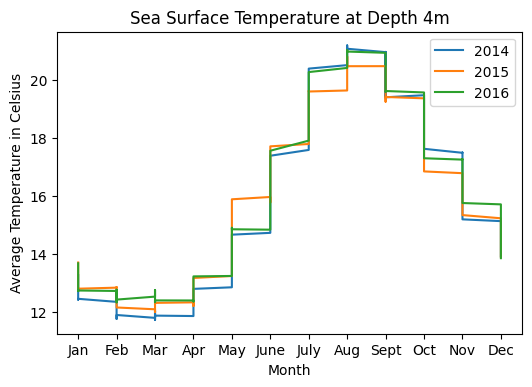

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, wt4_2014)
plt.plot(xlabel, wt4_2015)
plt.plot(xlabel, wt4_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Temperature in Celsius')
plt.title('Sea Surface Temperature at Depth 4m')
plt.show()

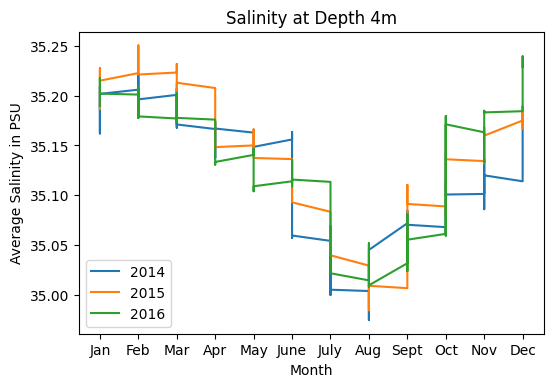

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, s4_2014)
plt.plot(xlabel, s4_2015)
plt.plot(xlabel, s4_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Salinity in PSU')
plt.title('Salinity at Depth 4m')
plt.show()

# Ocean Depth: 40m

In [ ]:
aoi = ee.Geometry(geometry)
ic_wt40 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('water_temp_40')
ic_s40 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('salinity_40')

In [ ]:
sd_2014_40 = '2014-01-01'
ed_2014_40 = '2014-12-31'

sd_2015_40 = '2015-01-01'
ed_2015_40 = '2015-12-31'

sd_2016_40 = '2016-01-01'
ed_2016_40 = '2016-12-31'

In [ ]:
ic_wt2014_40 = ic_wt40.filterDate(sd_2014_40, ed_2014_40)
ic_s2014_40 = ic_s40.filterDate(sd_2014_40, ed_2014_40)

ic_wt2015_40 = ic_wt40.filterDate(sd_2015_40, ed_2015_40)
ic_s2015_40 = ic_s40.filterDate(sd_2015_40, ed_2015_40)

ic_wt2016_40 = ic_wt40.filterDate(sd_2016_40, ed_2016_40)
ic_s2016_40 = ic_s40.filterDate(sd_2016_40, ed_2016_40)

In [ ]:
mean_spatial_2014_wt40 = ic_wt2014_40.map(setProperty)
mean_spatial_2014_s40 = ic_s2014_40.map(setProperty)

mean_spatial_2015_wt40 = ic_wt2015_40.map(setProperty)
mean_spatial_2015_s40 = ic_s2015_40.map(setProperty)

mean_spatial_2016_wt40 = ic_wt2016_40.map(setProperty)
mean_spatial_2016_s40 = ic_s2016_40.map(setProperty)

In [ ]:
wt40_2014 = mean_spatial_2014_wt40.aggregate_array('water_temp_40').getInfo()
s40_2014 = mean_spatial_2014_s40.aggregate_array('salinity_40').getInfo()

wt40_2015 = mean_spatial_2015_wt40.aggregate_array('water_temp_40').getInfo()
s40_2015 = mean_spatial_2015_s40.aggregate_array('salinity_40').getInfo()

wt40_2016 = mean_spatial_2016_wt40.aggregate_array('water_temp_40').getInfo()
s40_2016 = mean_spatial_2016_s40.aggregate_array('salinity_40').getInfo()

In [ ]:
wt40_2014 = np.array(wt40_2014)
wt40_2014 = (wt40_2014/1000) + 20
wt40_2014 = wt40_2014[:359] 

wt40_2015 = np.array(wt40_2015)
wt40_2015 = (wt40_2015/1000) + 20
wt40_2015 = wt40_2015[:359] 

wt40_2016 = np.array(wt40_2016)
wt40_2016 = (wt40_2016/1000) + 20
wt40_2016 = wt40_2016[:359] 

s40_2014 = np.array(s40_2014)
s40_2014 = (s40_2014/1000) + 20
s40_2014 = s40_2014[:359] 

s40_2015 = np.array(s40_2015)
s40_2015 = (s40_2015/1000) + 20
s40_2015 = s40_2015[:359] 

s40_2016 = np.array(s40_2016)
s40_2016 = (s40_2016/1000) + 20
s40_2016 = s40_2016[:359] 

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
xlabel = []
for i in range(0, len(months)):
  for _ in range (0, 30):
    xlabel.append(months[i])

xlabel = xlabel[:359]

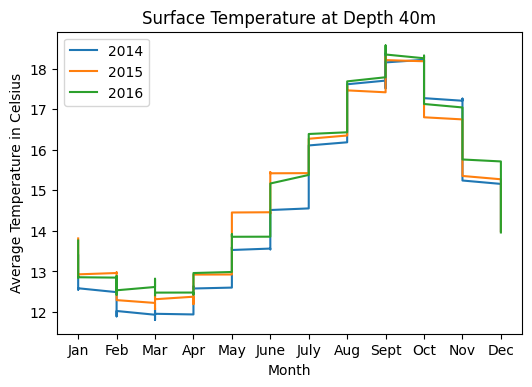

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, wt40_2014)
plt.plot(xlabel, wt40_2015)
plt.plot(xlabel, wt40_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Temperature in Celsius')
plt.title('Surface Temperature at Depth 40m')
plt.show()

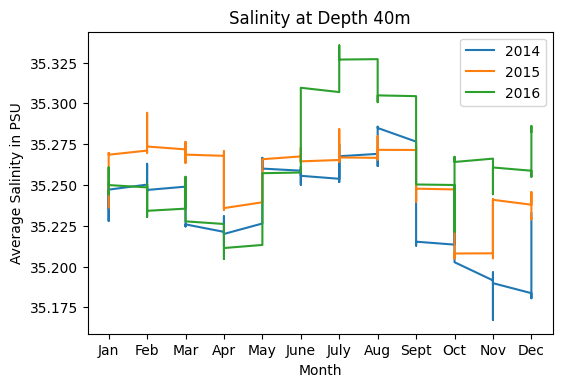

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, s40_2014)
plt.plot(xlabel, s40_2015)
plt.plot(xlabel, s40_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Salinity in PSU')
plt.title('Salinity at Depth 40m')
plt.show()

# Ocean Depth: 150m

In [ ]:
aoi = ee.Geometry(geometry)
ic_wt150 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('water_temp_150')
ic_s150 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('salinity_150')

In [ ]:
sd_2014_150 = '2014-01-01'
ed_2014_150 = '2014-12-31'

sd_2015_150 = '2015-01-01'
ed_2015_150 = '2015-12-31'

sd_2016_150 = '2016-01-01'
ed_2016_150 = '2016-12-31'

In [ ]:
ic_wt2014_150 = ic_wt150.filterDate(sd_2014_150, ed_2014_150)
ic_s2014_150 = ic_s150.filterDate(sd_2014_150, ed_2014_150)

ic_wt2015_150 = ic_wt150.filterDate(sd_2015_150, ed_2015_150)
ic_s2015_150 = ic_s150.filterDate(sd_2015_150, ed_2015_150)

ic_wt2016_150 = ic_wt150.filterDate(sd_2016_150, ed_2016_150)
ic_s2016_150 = ic_s150.filterDate(sd_2016_150, ed_2016_150)

In [ ]:
mean_spatial_2014_wt150 = ic_wt2014_150.map(setProperty)
mean_spatial_2014_s150 = ic_s2014_150.map(setProperty)

mean_spatial_2015_wt150 = ic_wt2015_150.map(setProperty)
mean_spatial_2015_s150 = ic_s2015_150.map(setProperty)

mean_spatial_2016_wt150 = ic_wt2016_150.map(setProperty)
mean_spatial_2016_s150 = ic_s2016_150.map(setProperty)

In [ ]:
wt150_2014 = mean_spatial_2014_wt150.aggregate_array('water_temp_150').getInfo()
s150_2014 = mean_spatial_2014_s150.aggregate_array('salinity_150').getInfo()

wt150_2015 = mean_spatial_2015_wt150.aggregate_array('water_temp_150').getInfo()
s150_2015 = mean_spatial_2015_s150.aggregate_array('salinity_150').getInfo()

wt150_2016 = mean_spatial_2016_wt150.aggregate_array('water_temp_150').getInfo()
s150_2016 = mean_spatial_2016_s150.aggregate_array('salinity_150').getInfo()

In [ ]:
wt150_2014 = np.array(wt150_2014)
wt150_2014 = (wt150_2014/1000) + 20
wt150_2014 = wt150_2014[:359] 

wt150_2015 = np.array(wt150_2015)
wt150_2015 = (wt150_2015/1000) + 20
wt150_2015 = wt150_2015[:359] 

wt150_2016 = np.array(wt150_2016)
wt150_2016 = (wt150_2016/1000) + 20
wt150_2016 = wt150_2016[:359] 

s150_2014 = np.array(s150_2014)
s150_2014 = (s150_2014/1000) + 20
s150_2014 = s150_2014[:359] 

s150_2015 = np.array(s150_2015)
s150_2015 = (s150_2015/1000) + 20
s150_2015 = s150_2015[:359] 

s150_2016 = np.array(s150_2016)
s150_2016 = (s150_2016/1000) + 20
s150_2016 = s150_2016[:359] 

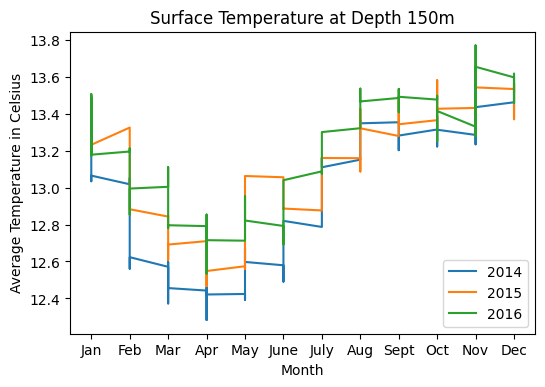

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, wt150_2014)
plt.plot(xlabel, wt150_2015)
plt.plot(xlabel, wt150_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Temperature in Celsius')
plt.title('Surface Temperature at Depth 150m')
plt.show()

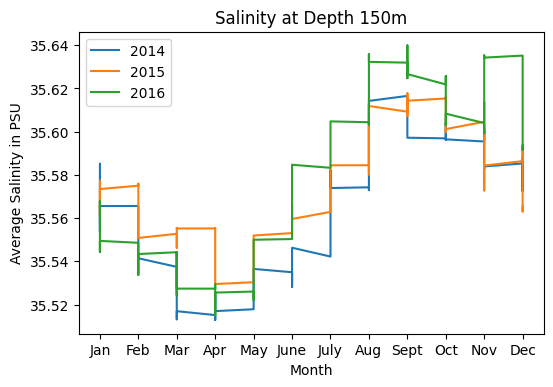

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, s150_2014)
plt.plot(xlabel, s150_2015)
plt.plot(xlabel, s150_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Salinity in PSU')
plt.title('Salinity at Depth 150m')
plt.show()